Importing Libraries

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import random
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Data Description

Importing the data

In [3]:
trset = pd.read_csv('globalterrorismdataset.csv', encoding = 'latin1')
trset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
type(trset)

pandas.core.frame.DataFrame

In [5]:
trset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
trset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
# Check the shape of dataset
trset.shape

(181691, 135)

In [8]:
trset.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [9]:
trset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# To check missing values/ Null values

trset.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
# To check duplicate values
trset.duplicated().sum()

0

Data Cleaning

In [12]:
#To print all the columns name
for i in trset.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [13]:
data = trset[['eventid','iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','specificity','location','summary','attacktype1_txt','targtype1_txt','natlty1_txt','gname','motive','weaptype1_txt','nkill','nwound','propextent_txt','dbsource']]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  specificity      181685 non-null  float64
 11  location         55495 non-null   object 
 12  summary          115562 non-null  object 
 13  attacktype1_txt  181691 non-null  object 
 14  targtype1_txt    181691 non-null  object 
 15  natlty1_txt      180132 non-null  object 
 16  gname            181691 non-null  obje

In [15]:
#Renaming the columns

trset = data.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country', 'region_txt':'region', 'provstate':'province','attacktype1_txt':'attack_type','targtype1_txt':'target_type','natlty1_txt':'nationality','weaptype1_txt':'weapon_type'})
trset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   eventid         181691 non-null  int64  
 1   year            181691 non-null  int64  
 2   month           181691 non-null  int64  
 3   day             181691 non-null  int64  
 4   country         181691 non-null  object 
 5   region          181691 non-null  object 
 6   province        181270 non-null  object 
 7   city            181257 non-null  object 
 8   latitude        177135 non-null  float64
 9   longitude       177134 non-null  float64
 10  specificity     181685 non-null  float64
 11  location        55495 non-null   object 
 12  summary         115562 non-null  object 
 13  attack_type     181691 non-null  object 
 14  target_type     181691 non-null  object 
 15  nationality     180132 non-null  object 
 16  gname           181691 non-null  object 
 17  motive    

In [16]:
trset.shape

(181691, 23)

In [17]:
#check null values

trset.isnull().sum()

eventid                0
year                   0
month                  0
day                    0
country                0
region                 0
province             421
city                 434
latitude            4556
longitude           4557
specificity            6
location          126196
summary            66129
attack_type            0
target_type            0
nationality         1559
gname                  0
motive            131130
weapon_type            0
nkill              10313
nwound             16311
propextent_txt    117626
dbsource               0
dtype: int64

In [18]:
trset['province'].fillna((0),inplace = True)
trset['city'].fillna((0),inplace = True)
trset['latitude'].fillna((0),inplace = True)
trset['longitude'].fillna((0),inplace = True)
trset['specificity'].fillna((0),inplace = True)
trset['location'].fillna((0),inplace = True)
trset['summary'].fillna((0),inplace = True)
trset['nationality'].fillna((0),inplace = True)
trset['motive'].fillna((0),inplace = True)
trset['nkill'].fillna((0),inplace = True)
trset['nwound'].fillna((0),inplace = True)
trset['propextent_txt'].fillna((0),inplace = True)

In [19]:
trset.isnull().sum()


eventid           0
year              0
month             0
day               0
country           0
region            0
province          0
city              0
latitude          0
longitude         0
specificity       0
location          0
summary           0
attack_type       0
target_type       0
nationality       0
gname             0
motive            0
weapon_type       0
nkill             0
nwound            0
propextent_txt    0
dbsource          0
dtype: int64

In [20]:
trset.duplicated().sum()

0

In [21]:
trset.head()

,eventid,year,month,day,country,region,province,city,latitude,longitude,...,attack_type,target_type,nationality,gname,motive,weapon_type,nkill,nwound,propextent_txt,dbsource
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0,Unknown,1.0,0.0,0,PGIS
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0,Unknown,0.0,0.0,0,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Assassination,Journalists & Media,United States,Unknown,0,Unknown,1.0,0.0,0,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0,Explosives,0.0,0.0,0,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0,Incendiary,0.0,0.0,0,PGIS


In [22]:
trset.tail()

,eventid,year,month,day,country,region,province,city,latitude,longitude,...,attack_type,target_type,nationality,gname,motive,weapon_type,nkill,nwound,propextent_txt,dbsource
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,...,Armed Assault,Military,Somalia,Al-Shabaab,0,Firearms,1.0,2.0,0,START Primary Collection
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,...,Bombing/Explosion,Military,Russia,Muslim extremists,0,Explosives,2.0,7.0,Unknown,START Primary Collection
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,...,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,0.0,0.0,Unknown,START Primary Collection
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,...,Bombing/Explosion,Government (General),India,Unknown,0,Explosives,0.0,0.0,0,START Primary Collection
181690,201712310032,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,...,Bombing/Explosion,Unknown,Philippines,Unknown,0,Explosives,0.0,0.0,0,START Primary Collection


In [23]:
trset.describe()

,eventid,year,month,day,latitude,longitude,specificity,nkill,nwound
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,1.451404,2.266860,2.883296
std,1.325957e+09,13.259430,3.388303,8.814045,18.699442,2.021946e+05,0.995448,11.227057,34.309747
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,1.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,1.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.538561,6.835734e+01,1.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,5.000000,1570.000000,8191.000000


In [24]:
trset.shape

(181691, 23)

# Performing Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

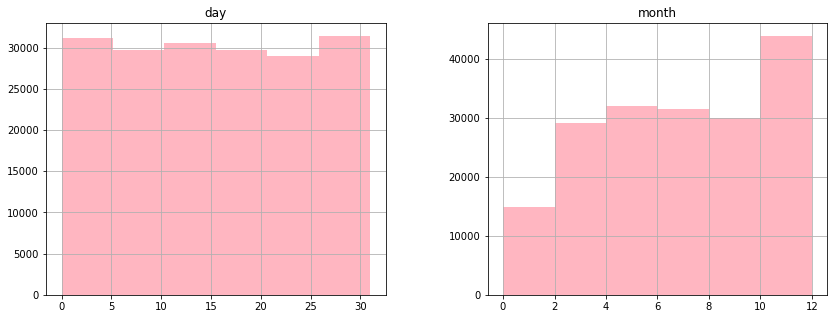

In [25]:
#plotting bar graph for attributes of dataset(day,month)
trset[['day','month']].hist(figsize=(14,5),bins=6,color='lightpink')


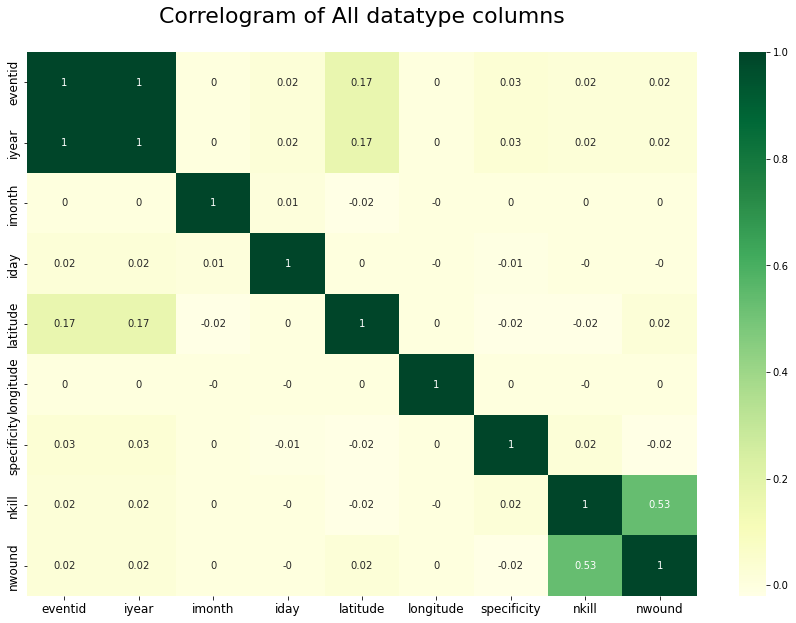

In [26]:
#correlation analysis
plt.figure(figsize=(15,10))
sns.heatmap(np.round(data.corr(),2),annot=True,cmap='YlGn')
#labeling for the plot 
plt.title('Correlogram of All datatype columns\n', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

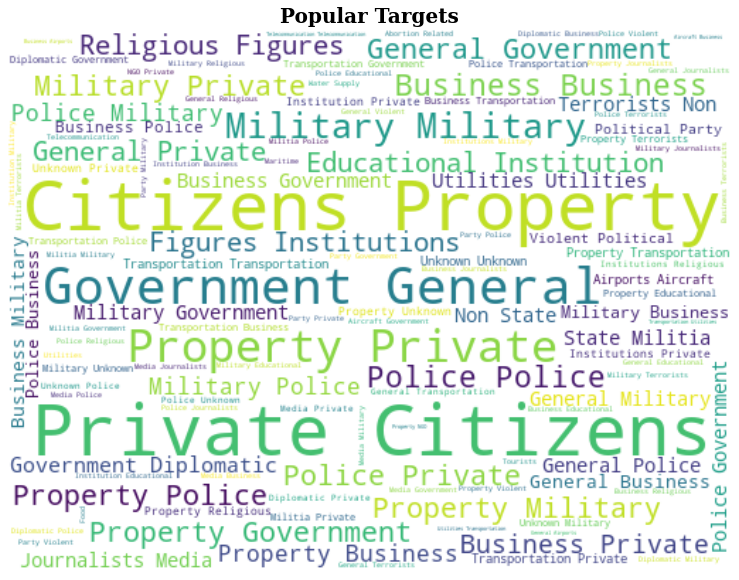

In [27]:
#Popular targets of attacks
city = trset.target_type.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384,).generate(' '.join(city))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Popular Targets', 
        fontdict={'family': 'serif',
        'color': 'black',
        'weight': 'bold',
        'size': 20,})
plt.show()


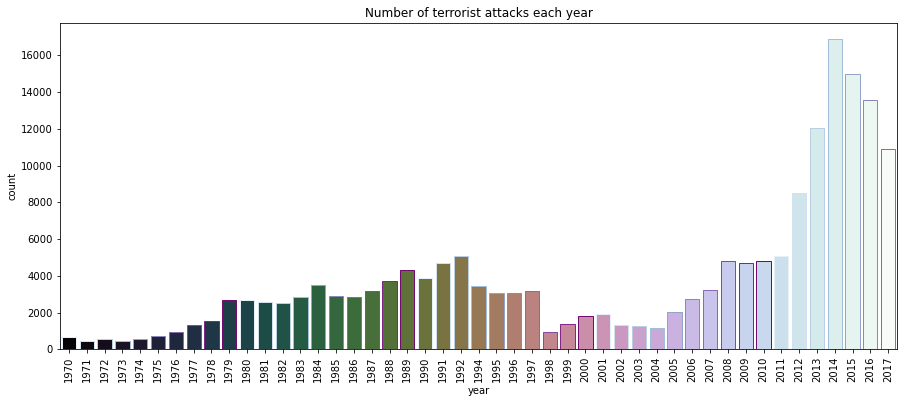

In [28]:
#number of terrorist attacks each year
plt.subplots(figsize=(15,6))
sns.countplot('year',data=trset,palette='cubehelix',edgecolor=sns.color_palette("BuPu",10))
plt.xticks(rotation=90)
plt.title('Number of terrorist attacks each year')
plt.show()

In [29]:
#Yearly total no. of attacks

yearly_attacks = trset['year'].value_counts(dropna = False).sort_index()
yearly_attacks.describe()

count       47.000000
mean      3865.765957
std       3836.943826
min        471.000000
25%       1364.000000
50%       2870.000000
75%       4503.500000
max      16903.000000
Name: year, dtype: float64

In [30]:
#Percentage increased
year=trset.year.value_counts().to_dict()
rate=((year[2017]-year[1970])/year[2017])*100
print(year[1970],'attacks happened in 1970 &',year[2017],'attacks happened in 2017')
print('so, the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
so, the number of attacks from 1970 has increased by 94.0 % till 2017


#### Conclusion: maximum attacks happen in year 2014 that is 16903

In [31]:
#terrorist activity by region in each year (Area Plot)

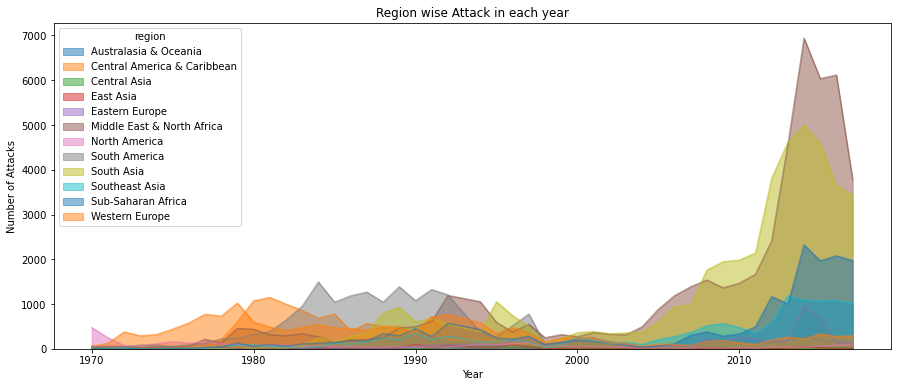

In [32]:
Reg_wise_attacks = pd.crosstab(trset.year, trset.region)
Reg_wise_attacks
Reg_wise_attacks.plot(kind = "area", figsize = (15,6), stacked = False, alpha = 0.5)
plt.title("Region wise Attack in each year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

In [33]:
Reg_wise_attacks.describe()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,6.000000,220.085106,11.978723,17.063830,109.446809,1073.914894,73.531915,403.787234,956.893617,265.638298,373.404255,354.021277
std,6.570686,334.197340,18.292894,22.102925,174.970284,1667.022884,75.227438,448.002763,1374.782595,323.863392,577.860020,220.615393
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,12.000000,24.000000,0.000000,2.000000,2.000000,50.000000
25%,1.000000,4.500000,0.000000,4.000000,3.000000,228.500000,34.500000,107.000000,28.500000,45.000000,60.000000,172.500000
50%,4.000000,11.000000,6.000000,9.000000,68.000000,373.000000,48.000000,172.000000,369.000000,159.000000,162.000000,333.000000
75%,9.500000,354.500000,14.500000,21.500000,151.500000,1189.500000,90.000000,578.000000,960.000000,313.500000,334.000000,475.500000
max,29.000000,1148.000000,77.000000,99.000000,962.000000,6939.000000,472.000000,1492.000000,4998.000000,1188.000000,2321.000000,1020.000000


### maximum attacks happen in "middle east and north africa" that is 6939 attacks

In [34]:
#top countries affected by terror attacks

In [35]:
top_countries =trset.country.value_counts().head(20)
top_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country, dtype: int64

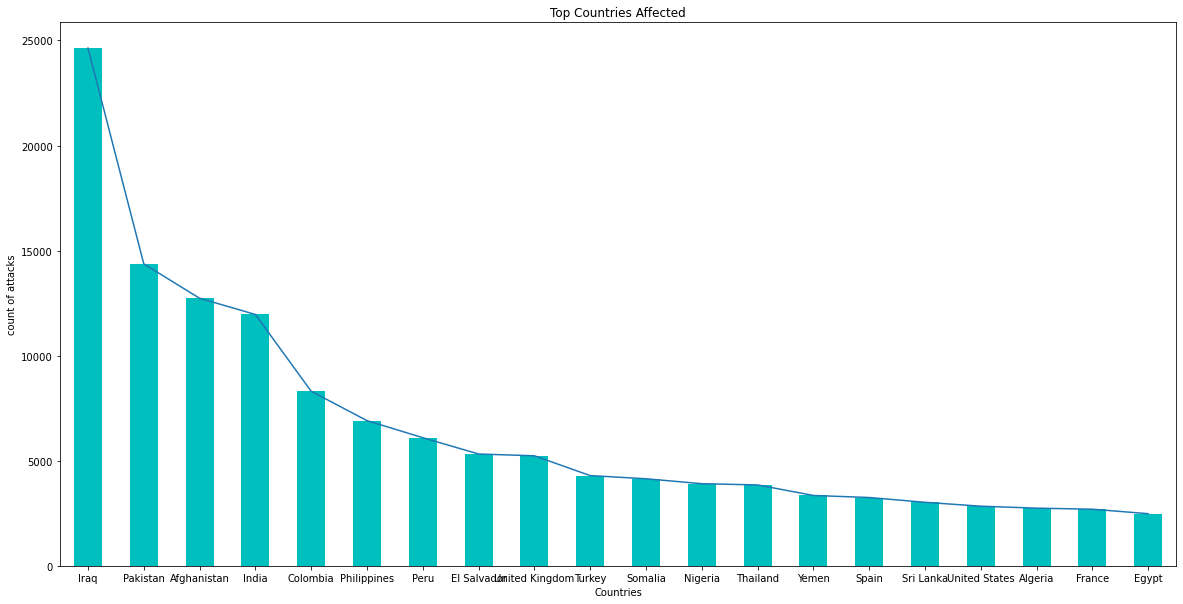

In [36]:
top_countries.plot(kind = "bar", color = "c", figsize = (20,10))
top_countries.plot(figsize = (20,10))
plt.title("Top Countries Affected")
plt.xlabel("Countries")
plt.ylabel("count of attacks")
plt.show()



### maximum attacks happen in Iraq with the count of 24636


In [37]:
#terrorist organization responsible for attacks

In [38]:
terror_org = trset.gname.value_counts()[1:20]
terror_org

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [39]:
#Taliban did the highest number of attacks with the count of 7478

In [40]:
#number of people killed in terror attack

In [41]:
#Region wise killed

Reg_wise_kill = trset[["region", "nkill"]].groupby("region").sum()
Reg_wise_kill

,nkill
region,
Australasia & Oceania,150.0
Central America & Caribbean,28708.0
Central Asia,1000.0
East Asia,1152.0
Eastern Europe,7415.0
Middle East & North Africa,137642.0
North America,4916.0
South America,28849.0
South Asia,101319.0


In [42]:
Reg_wise_kill.describe()

,nkill
count,12.000000
mean,34322.333333
std,45970.536504
min,150.000000
25%,3975.000000
50%,11526.000000
75%,41233.250000
max,137642.000000


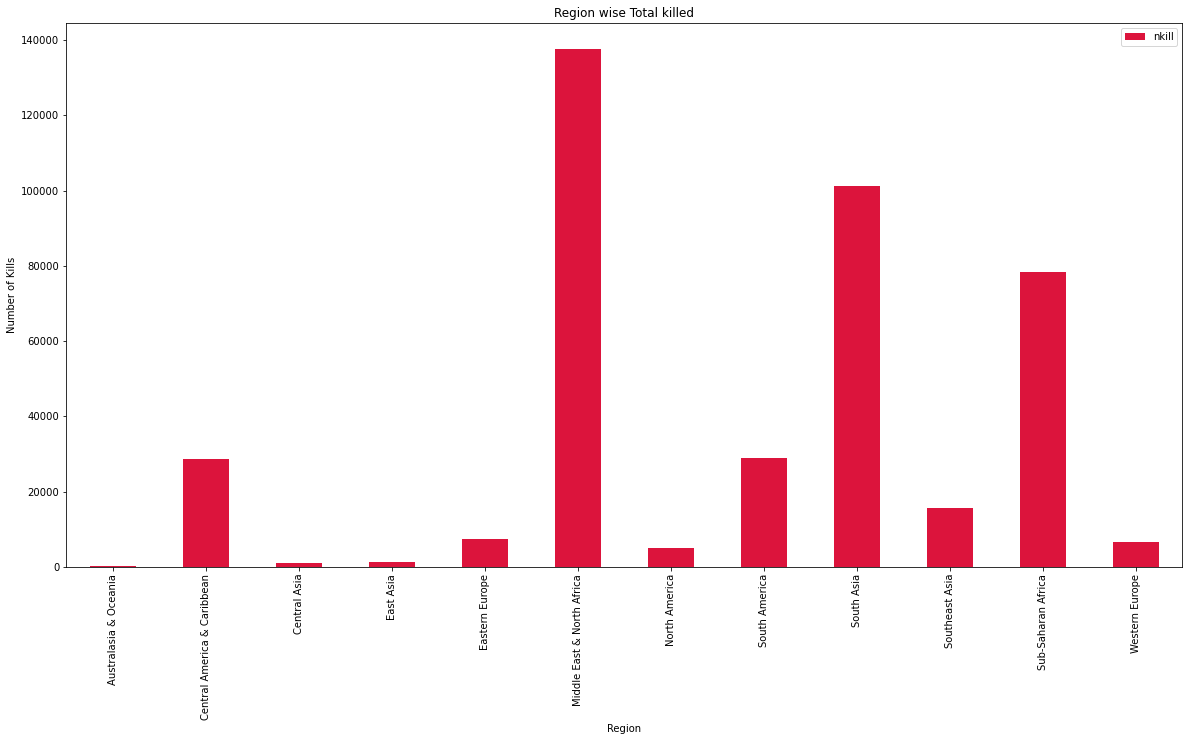

In [43]:
#Plot Killed Data

Reg_wise_kill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Region wise Total killed")
plt.xlabel("Region")
plt.ylabel("Number of Kills")
plt.show()

In [44]:
# The most number of kills were in Middle East & North Africa with kills: 137642

In [45]:
# Country wise total number of kills happens.

total_kill = trset.loc[:,'nkill']
print('Number of people killed by terror attack:',int(sum(total_kill))) 

Number of people killed by terror attack: 411868


In [46]:
#Countrywise Killed

Country_wise_Kill = trset[["country", "nkill"]].groupby("country").sum().sort_values(by ='nkill', ascending =False).head(10)
Country_wise_Kill

,nkill
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [47]:
Country_wise_Kill.describe()

,nkill
count,10.00000
mean,25409.90000
std,20342.19228
min,12053.00000
25%,14830.75000
50%,17435.50000
75%,23537.00000
max,78589.00000


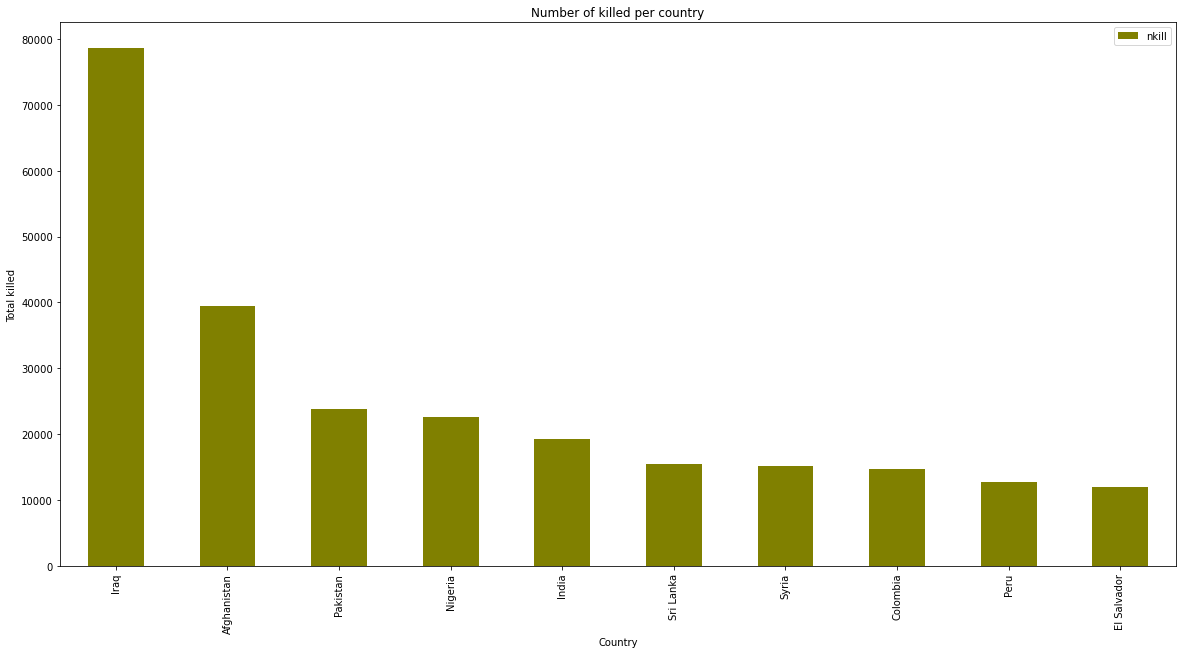

In [48]:
#Plot Killed Data

Country_wise_Kill.plot(kind = "bar", color = "olive", figsize = (20,10))
plt.title("Number of killed per country")
plt.xlabel("Country")
plt.ylabel("Total killed")
plt.show()

In [49]:
#maximum killings happen in Iraq that is 78589

In [50]:
#City wise Killed

City_wise_Kill = trset["city"].value_counts()[1:21]
City_wise_Kill

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Name: city, dtype: int64

In [51]:
City_wise_Kill.describe()

count      20.0000
mean     1611.9000
std      1536.1905
min       738.0000
25%       834.7500
50%      1001.5000
75%      1758.5000
max      7589.0000
Name: city, dtype: float64

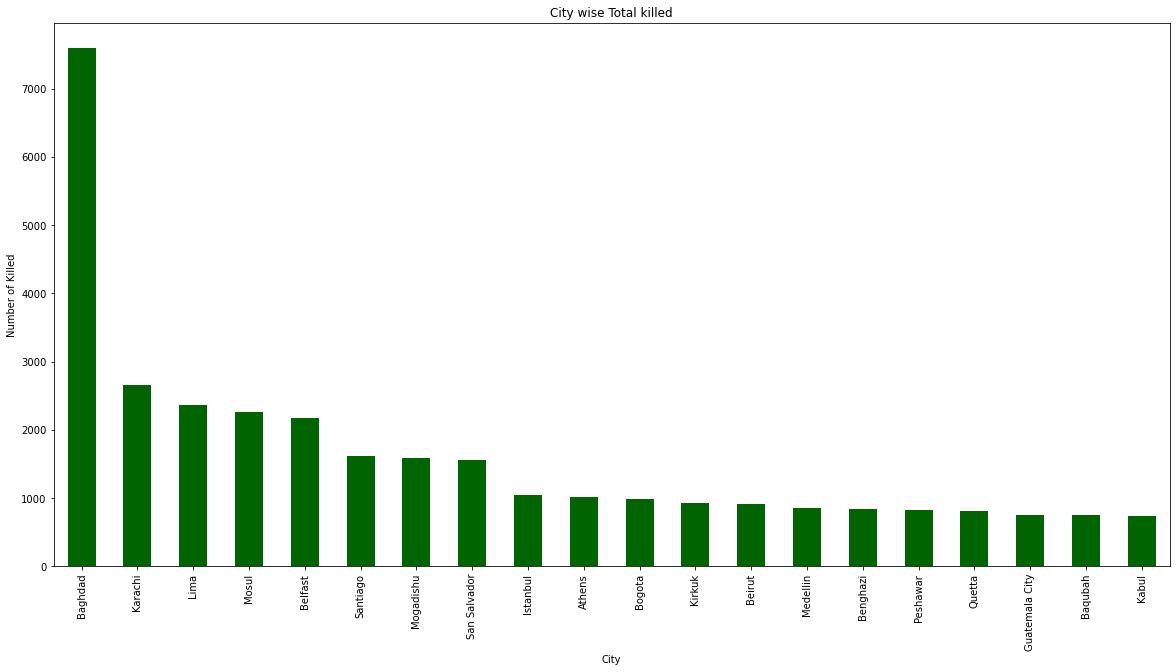

In [52]:
#Plot Killed Data

City_wise_Kill.plot(kind = "bar", color = "darkgreen", figsize = (20,10))
plt.title("City wise Total killed")
plt.xlabel("City")
plt.ylabel("Number of Killed")
plt.show()

In [53]:
#Most number of kills were in Baghdad with kills 7589

In [54]:
#Total number of wounded people in attacks

In [55]:
total_wounded = trset.loc[:,'nwound']
print('Number of people wounded by terror attack:',int(sum(total_wounded))) 

Number of people wounded by terror attack: 523869


In [56]:
#Countrywise wounded

Country_wise_wounded = trset[["country", "nwound"]].groupby("country").sum().sort_values(by ='nwound', ascending =False).head(10)
Country_wise_wounded

,nwound
country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


In [57]:
Country_wise_wounded.describe()

,nwound
count,10.000000
mean,33495.600000
std,37658.337389
min,10328.000000
25%,13552.500000
50%,18131.500000
75%,38773.500000
max,134690.000000


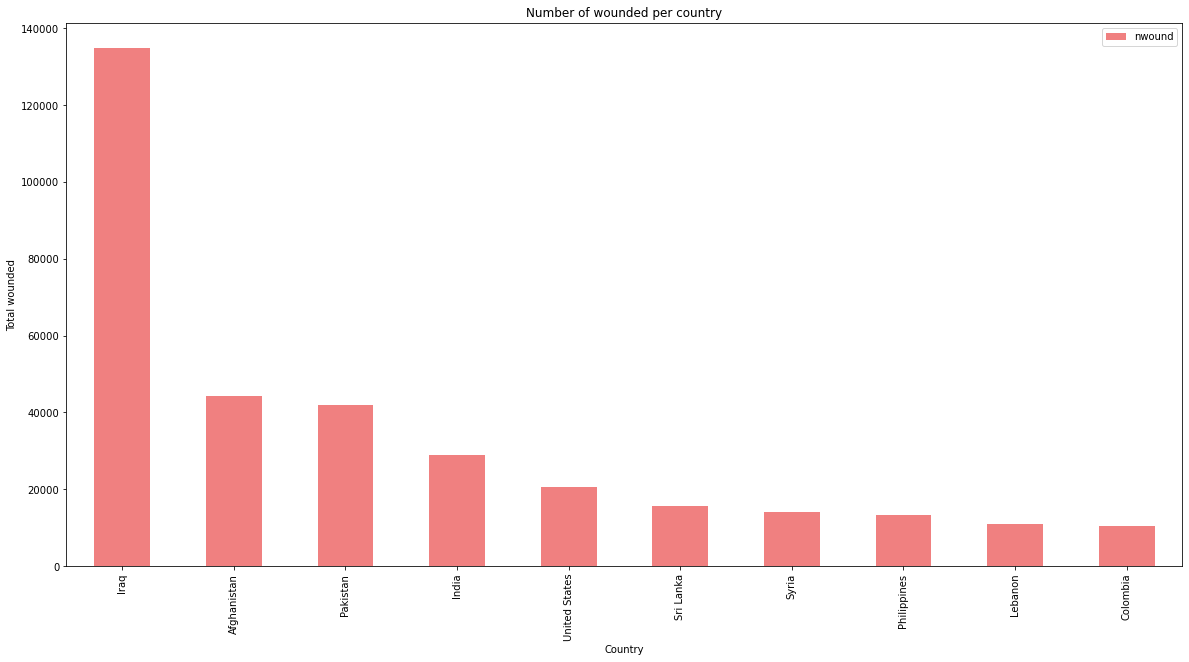

In [58]:
# Plot of Country wise wounded

Country_wise_wounded.plot(kind = "bar", color = "lightcoral", figsize = (20,10))
plt.title("Number of wounded per country")
plt.xlabel("Country")
plt.ylabel("Total wounded")
plt.show()

In [59]:
#Maximum number of wounded were in Iraq that is 134690

In [60]:
#Top countries with maximum casualities

In [61]:
trset['nwound'] = trset['nwound'].fillna(0).astype(int)
trset['nkill'] = trset['nkill'].fillna(0).astype(int)
trset['casualities'] = trset['nkill'] + trset['nwound']

In [62]:
Country_wise_casuality = trset[["country", "casualities"]].groupby("country").sum().sort_values(by ='casualities', ascending =False).head(10)
Country_wise_casuality

,casualities
country,
Iraq,213279
Afghanistan,83661
Pakistan,65860
India,48321
Nigeria,32920
Sri Lanka,31091
Syria,29338
Colombia,25026
United States,24473


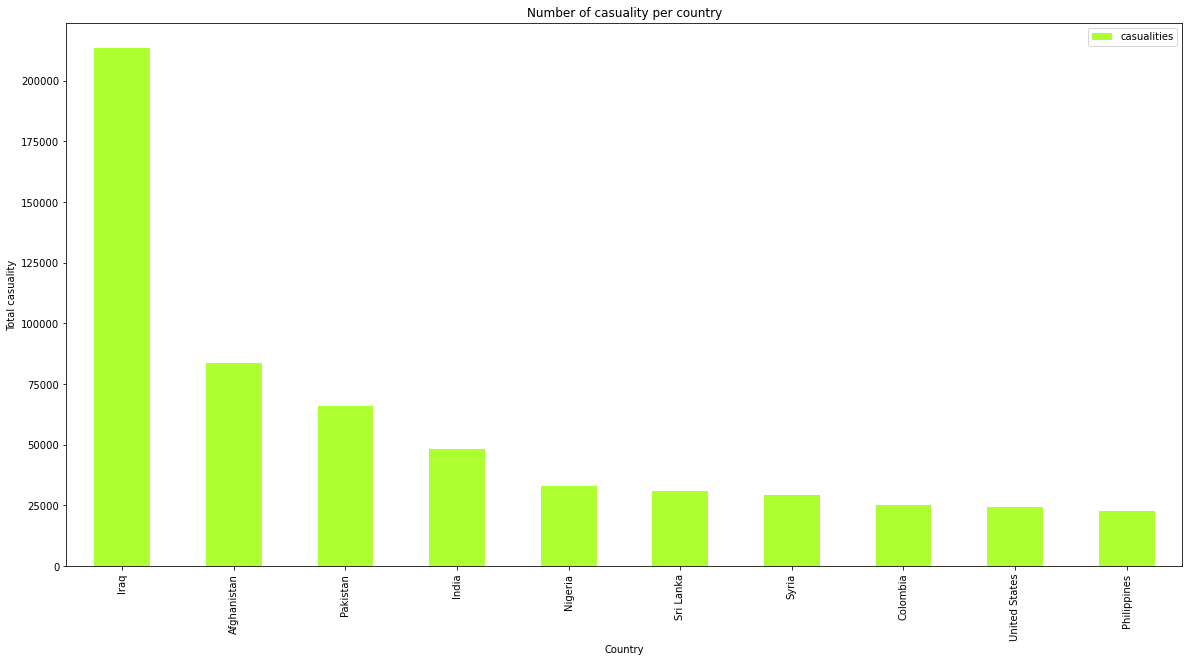

In [63]:
#Plot Killed Data

Country_wise_casuality.plot(kind = "bar", color = "greenyellow", figsize = (20,10))
plt.title("Number of casuality per country")
plt.xlabel("Country")
plt.ylabel("Total casuality")
plt.show()

In [64]:
#Maximum Casualities happen in "Iraq" with the count of 213279

In [65]:
#Attack types that caused these deaths

In [66]:
# types of attacks these deaths were made of.
attacks = trset.loc[:,'attack_type']
# Attack Data
typeKillData = pd.concat([attacks, total_kill], axis=1)

In [67]:
typeKillData.head()

,attack_type,nkill
0,Assassination,1.0
1,Hostage Taking (Kidnapping),0.0
2,Assassination,1.0
3,Bombing/Explosion,0.0
4,Facility/Infrastructure Attack,0.0


In [68]:
typeKillFormatData = typeKillData.pivot_table(columns='attack_type', values='nkill', aggfunc='sum')
typeKillFormatData

attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


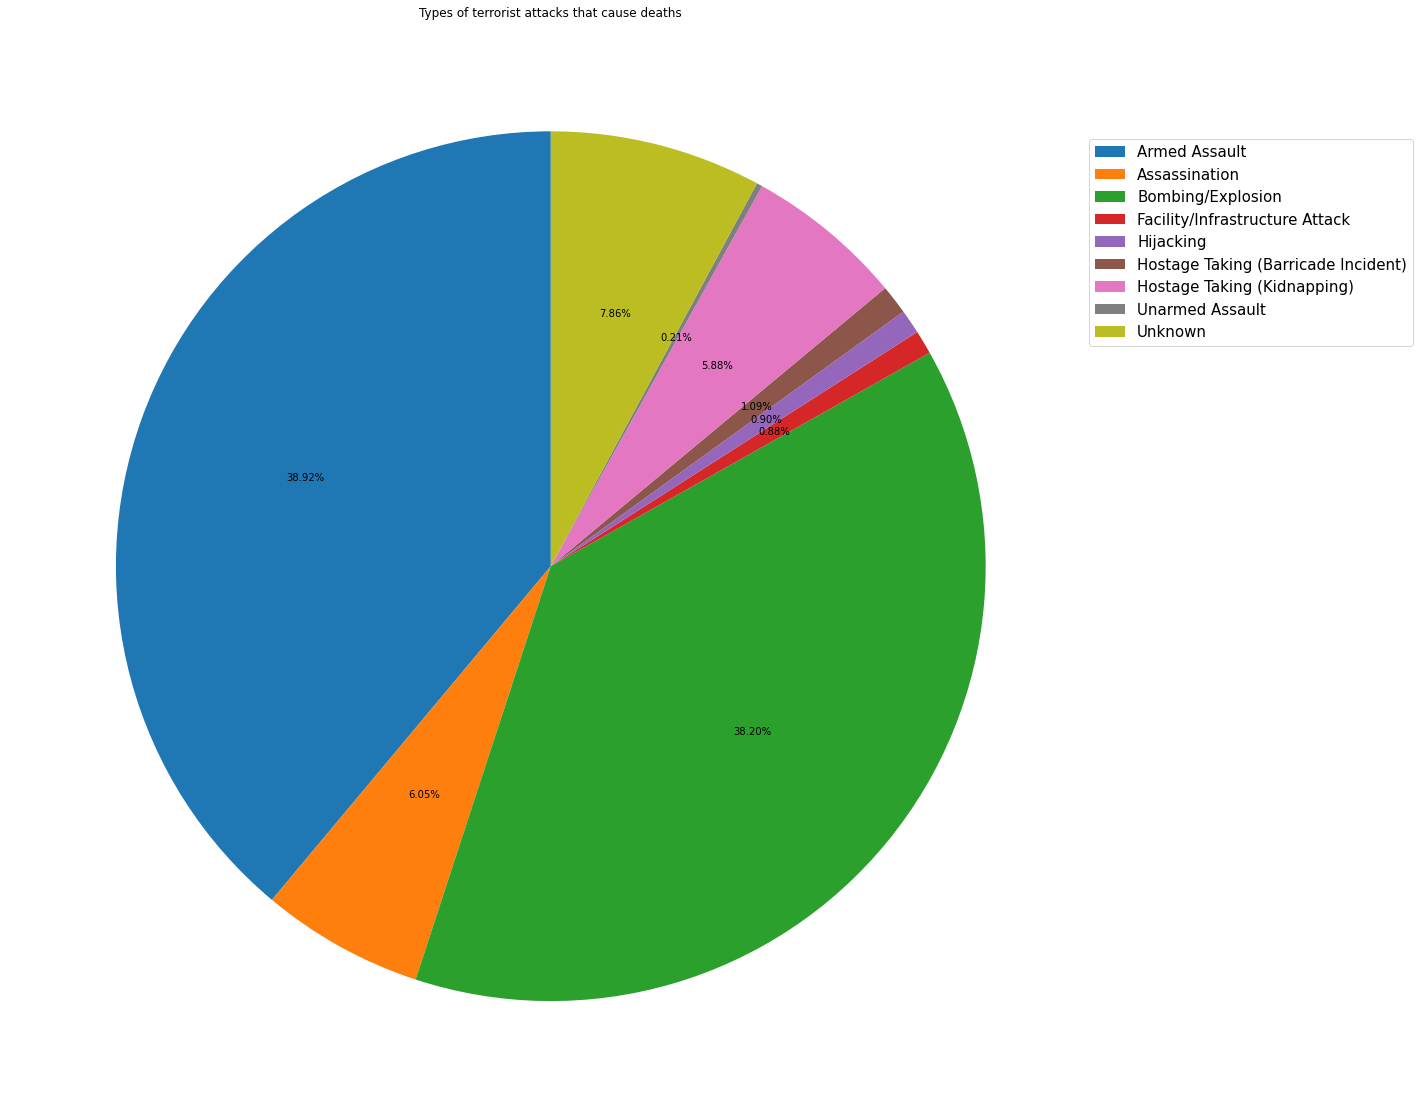

In [69]:
labels = typeKillFormatData.columns.tolist()
index = np.arange(len(labels))
transpoze = typeKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] 
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

In [70]:
# Armed assault and bombing/explosion are seen to be the cause of maximum number of the deaths in these attacks.  These are the reason for around 77% deaths.

In [87]:
#number of attacks in each country
terr = trset.groupby(['country'], as_index=False).count()

fig = px.choropleth(terr, locations='country', locationmode = 'country names',
                   color='year', hover_name='country', projection='orthographic',
                   title='Total number of attacks (1970-2017)', labels={'year': 'Attacks'})
fig.show()

In [72]:
#terrorist organization responsible for attacks

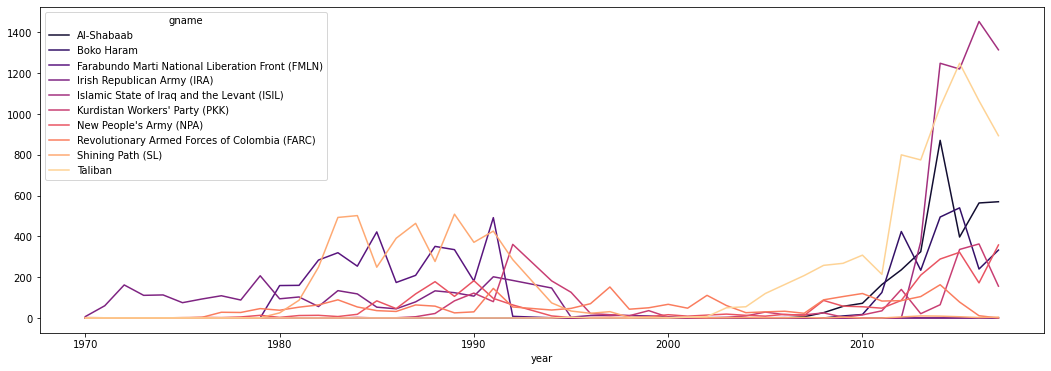

In [73]:
top_groups=trset[trset['gname'].isin(trset['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups.year,top_groups.gname).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [74]:
#Groups and countrywise attacks of terrorists

In [75]:
T_Attack = trset[["gname", "country"]].value_counts().drop("Unknown").head(20)
T_Attack

gname                                             country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Basque Fatherland and Freedom (ETA)               Spain             1975
Communist Party of India - Maoist (CPI-Maoist)    India             1877
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka

In [76]:
T_Attack.describe()

count      20.000000
mean     2415.250000
std      1620.937964
min       829.000000
25%      1380.750000
50%      2031.000000
75%      2794.250000
max      7423.000000
dtype: float64

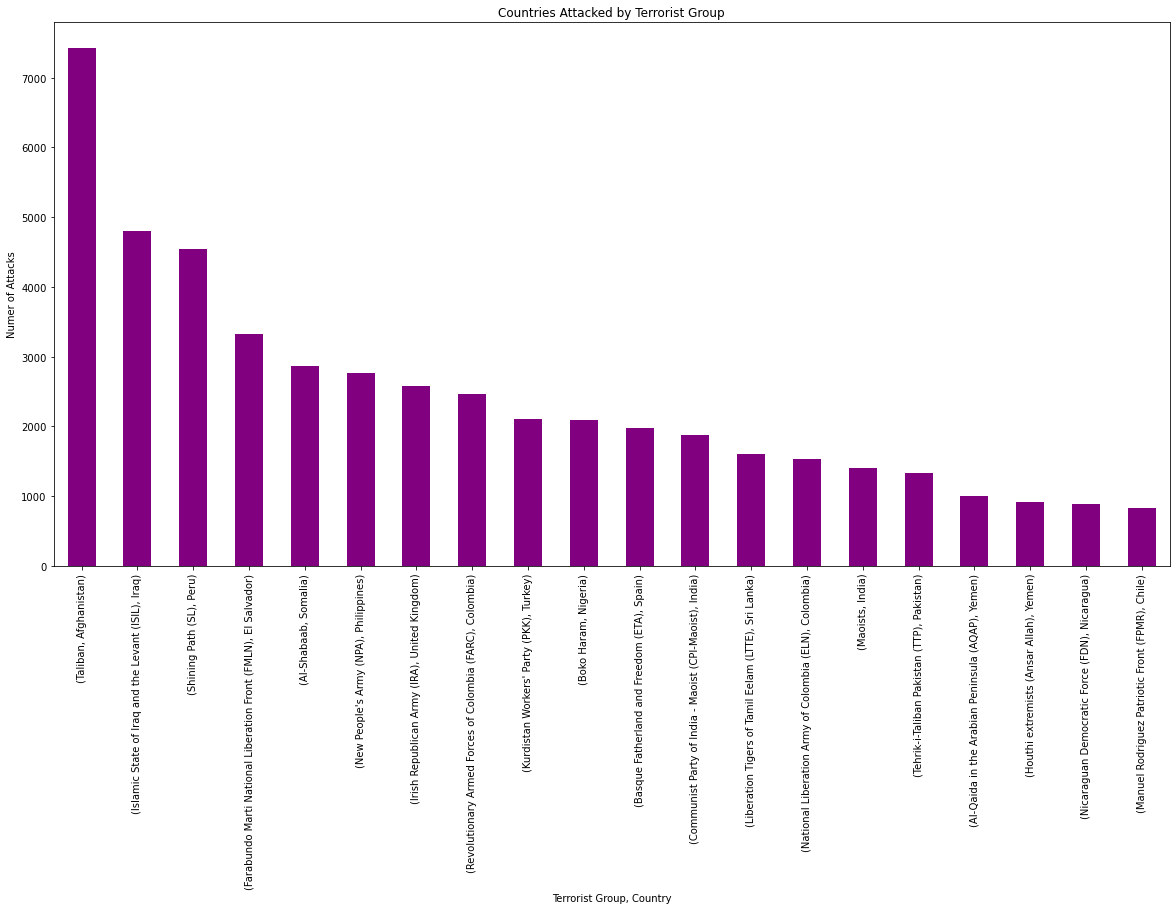

In [77]:
#Plot of Attack Data

T_Attack.plot(kind = "bar", color = "purple", figsize = (20,10))
plt.title("Countries Attacked by Terrorist Group")
plt.xlabel("Terrorist Group, Country")
plt.xticks()
plt.ylabel("Numer of Attacks")
plt.show()

In [78]:
# The most number of attacks were done by Taliban in Afghanistan with attacks: 7423.

In [79]:
#Affects world wide beacuse of these attacks

In [80]:
#Casualty

Total_cas = trset.loc[:, "casualities"].sum()

print("Total number of Casualties accross the world from 1970 to 2020 : ",Total_cas)

Total number of Casualties accross the world from 1970 to 2020 :  935736


In [81]:
#Killed

Total_Kill = trset.loc[:, "nkill"].sum()

print("Total number of Killed accross the world from 1970 to 2020 : ", Total_Kill)

Total number of Killed accross the world from 1970 to 2020 :  411868


In [82]:
#Wounded

Total_Wound = trset.loc[:, "nwound"].sum()

print("Total number of Wounded accross the world from 1970 to 2020 : ", Total_Wound) 

Total number of Wounded accross the world from 1970 to 2020 :  523868


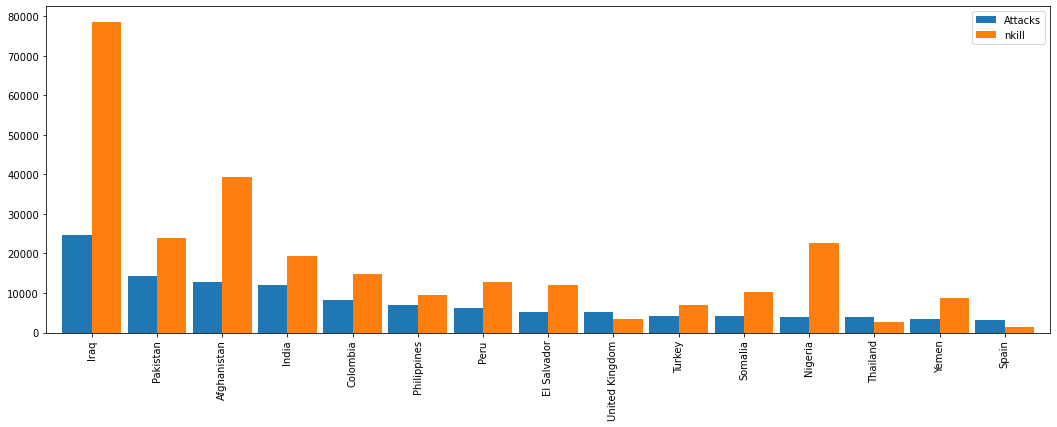

In [83]:
#attacks vs killed
coun_terror=trset['country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=trset.groupby('country')['nkill'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [84]:
#inference

In [85]:
print("Country with the most attacks:",trset['country'].value_counts().idxmax())
print("City with the most attacks:",trset['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",trset['region'].value_counts().idxmax())
print("Year with the most attacks:",trset['year'].value_counts().idxmax())
print("Month with the most attacks:",trset['month'].value_counts().idxmax())
print("Group with the most attacks:",trset['gname'].value_counts().index[1])
print("Most Attack Types:",trset['attack_type'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [86]:

# The Middle East and North Africa are seen to be the places of serious terrorist attacks. 
# Iraq is the country which has faced the most terror attacks.
# "Taliban" is the most responsible group for all these attacks.
# Bombing/Explosion is the attacks type which happens most during these terrorist attacks.